# Aggregating GEO Datasets for TCGA Validation

In [1]:
import NotebookImport
from DX_screen import *

importing IPython notebook from DX_screen

importing IPython notebook from Imports

importing IPython notebook from Global_Parameters

In [2]:
store = pd.HDFStore(MICROARRAY_STORE)
microarray = store['data']
tissue = store['tissue']

In [3]:
tissue.value_counts()

LIHC        1146
PRAD         424
COADREAD     367
PANCAN       341
COAD         334
KIRC         144
BRCA         108
NSCLC         40
dtype: int64

In [4]:
dx = microarray.xs('01',1,1) - microarray.xs('11',1,1)
tt = tissue[:,'01'].replace('COAD','COADREAD')
genes = ti(dx.notnull().sum(1) > 500)
dx = dx.ix[genes]

Simple average

In [5]:
dx_simple = binomial_test_screen(microarray.ix[genes])

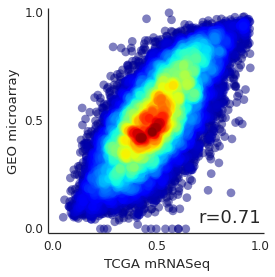

In [6]:
fig, ax = subplots(figsize=(4,4))
s1, s2 = match_series(dx_rna.frac, dx_simple.frac)
plot_regression(s1, s2, density=True, rad=.02, ax=ax, rasterized=True,
                line_args={'lw':0})
ax.set_ylabel("GEO microarray")
ax.set_xlabel("TCGA mRNASeq")
ann = ax.get_children()[4]
ann.set_text(ann.get_text().split()[0])
ax.set_xticks([0, .5, 1])
ax.set_yticks([0, .5, 1])
fig.tight_layout()

Group by tissue type first and then average. This is to limit the heavy skew of liver cancer samples in the GEO dataset.

In [7]:
pos = (dx>0).groupby(tt, axis=1).sum() 
count = dx.groupby(tt, axis=1).count().replace(0, np.nan)
count = count[count.sum(1) > 500]
frac_df = 1.*pos / count
frac_microarray = frac_df.mean(1)

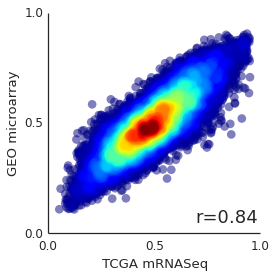

In [8]:
fig, ax = subplots(figsize=(4,4))
s1, s2 = match_series(dx_rna.frac, frac_microarray)
plot_regression(s1, s2, density=True, rad=.02, ax=ax, rasterized=True,
                line_args={'lw':0})
ax.set_ylabel("GEO microarray")
ax.set_xlabel("TCGA mRNASeq")
ann = ax.get_children()[4]
ann.set_text(ann.get_text().split()[0])
ax.set_xticks([0, .5, 1])
ax.set_yticks([0, .5, 1])
fig.tight_layout()

Grouping both TCGA and GEO based on tissue first.  This is not the approach we use for the TCGA data in the rest of the analyses, so I'm just doing this to show that it does not effect performance of the replication.

In [9]:
dx2 = (rna_df.xs('01',1,1) - rna_df.xs('11',1,1)).dropna(1)
cc = codes.ix[dx2.columns]
cc = cc[cc.isin(ti(cc.value_counts() > 10))]

pos = (dx2>0).groupby(cc, axis=1).sum() 
count = dx2.replace(0, np.nan).groupby(cc, axis=1).count()
count = count[count.sum(1) > 500]
frac_df = 1.*pos / count
frac_tcga= frac_df.mean(1)

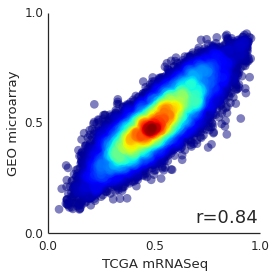

In [10]:
fig, ax = subplots(figsize=(4,4))
s1, s2 = match_series(frac_tcga, frac_microarray)
plot_regression(s1, s2, density=True, rad=.02, ax=ax, rasterized=True,
                line_args={'lw':0})
ax.set_ylabel("GEO microarray")
ax.set_xlabel("TCGA mRNASeq")
ann = ax.get_children()[4]
ann.set_text(ann.get_text().split()[0])
ax.set_xticks([0, .5, 1])
ax.set_yticks([0, .5, 1])
fig.tight_layout()